# H&M - Clothes to Vec!

In [44]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
import hnswlib
import glob

In [45]:
# !python main.py

## Embed the H&M Clothes

### Load images function

In [46]:
def load_img(path):
    # Read the image and prepare it for tf
    img = tf.io.read_file(path)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.image.resize_with_pad(img, 224, 224)
    img = tf.image.convert_image_dtype(img,tf.float32)[tf.newaxis, ...]

    return img

### Load the model

In [3]:
# I could try other models or fine tune it, but that would be a longer project!
module_handle = "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4"
module = hub.load(module_handle)

### Img2Vec

In [4]:
from tqdm import tqdm

def get_image_feature_vectors():
    embeddings = []
    # Loops through all images in a local folder and creates the embeddings
    for filename in tqdm(glob.glob('./images/*.jpg')):
        img = load_img(filename)
        features = module(img)
        # Remove single-dimensional entries from the 'features' array
        feature_set = np.squeeze(features)
        # add to embeddings
        embeddings.append(feature_set)

    return embeddings

embeddings = get_image_feature_vectors()

100%|██████████| 2427/2427 [02:01<00:00, 19.99it/s]


### Store the embeddings in a pikle file

In [5]:
import pickle

with open('./embeddings.pkl', "wb") as fOut:
    pickle.dump({'embeddings': embeddings}, fOut)

## Create HNSW index

In [25]:
embedding_size = len(embeddings[0])
top_k_hits = 5
len_corpus = len(embeddings)

# We use Inner Product (dot-product) as Index. We will normalize our vectors to unit length, then is Inner Product equal to cosine similarity
index_path = "./hnswlib.bin"
index = hnswlib.Index(space='cosine', dim=embedding_size)

In [26]:
# Create the HNSWLIB index
# ef_construction - controls index search speed/build speed tradeoff
# M - is tightly connected with internal dimensionality of the data. Strongly affects memory consumption (~M)
# Higher M leads to higher accuracy/run_time at fixed ef/efConstruction
index.init_index(max_elements=len_corpus, ef_construction=200, M=16)

# Then we train the index to find a suitable clustering
index.add_items(embeddings, list(range(len(embeddings))))
index.save_index(index_path)

# Controlling the recall by setting ef:
index.set_ef(50) # ef should always be > top_k_hits

len(embeddings)

2427

## Test!

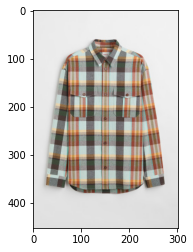

In [30]:
image_number = 1000

image_to_query = f'images/images{image_number}.jpg'

# transform image to vector
img = load_img(image_to_query)
features = module(img)
vector_to_search = np.squeeze(features)

# show the image
image = plt.imread(image_to_query)
plt.imshow(image)

[4, 1751, 265, 1413, 1858]


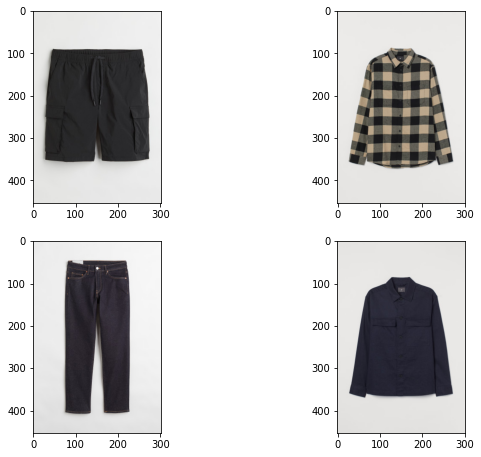

In [32]:
# Search with HNSW for the most similar vectors
corpus_ids, distances = index.knn_query(vector_to_search, k=top_k_hits)
hits = [{'corpus_id': id, 'score': 1-score} for id, score in zip(corpus_ids[0], distances[0])]

# Append the passages
passages_id = []

for hit in hits[:top_k_hits]:
    passages_id.append(int(hit['corpus_id']))

print(passages_id)

plt.figure(figsize=(10, 12))

for i, passage_id in enumerate(passages_id[:4]):
    ax = plt.subplot(3, 2, i + 1)

    image = plt.imread(f'./images/images{passage_id}.jpg')
    plt.imshow(image)

plt.show()

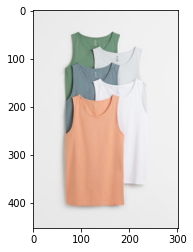

In [36]:
image_number = 100

image_to_query = f'images/images{image_number}.jpg'
img = load_img(image_to_query)
features = module(img)
vector_to_search = np.squeeze(features)

image = plt.imread(image_to_query)
plt.imshow(image)

[3, 1650, 1688, 257, 201]


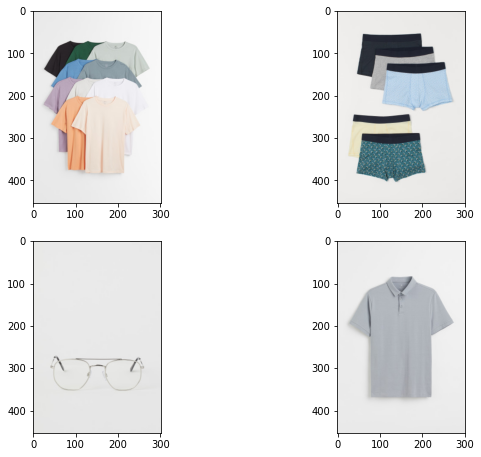

In [37]:
# Search with HNSW for the best passsage
corpus_ids, distances = index.knn_query(vector_to_search, k=top_k_hits)
hits = [{'corpus_id': id, 'score': 1-score} for id, score in zip(corpus_ids[0], distances[0])]

# Append the passages
passages_id = []

for hit in hits[:top_k_hits]:
    if hit['corpus_id'] == image_number:
        pass
    else:
        passages_id.append(int(hit['corpus_id']))

print(passages_id)

plt.figure(figsize=(10, 12))

for i, passage_id in enumerate(passages_id[:4]):
    ax = plt.subplot(3, 2, i + 1)

    image = plt.imread(f'./images/images{passage_id}.jpg')
    plt.imshow(image)

plt.show()

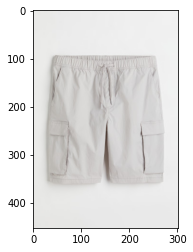

In [40]:
image_number = 200

image_to_query = f'images/images{image_number}.jpg'
img = load_img(image_to_query)
features = module(img)
vector_to_search = np.squeeze(features)

image = plt.imread(image_to_query)
plt.imshow(image)

[1114, 445, 1967, 1121, 915]


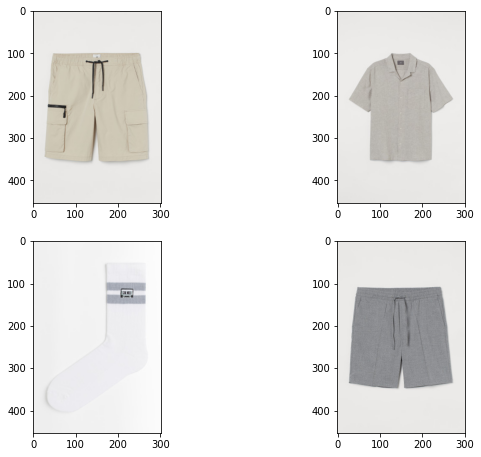

In [41]:
# Search with HNSW for the best passsage
corpus_ids, distances = index.knn_query(vector_to_search, k=top_k_hits)
hits = [{'corpus_id': id, 'score': 1-score} for id, score in zip(corpus_ids[0], distances[0])]

# Append the passages
passages_id = []

for hit in hits[:top_k_hits]:
    if hit['corpus_id'] == image_number:
        pass
    else:
        passages_id.append(int(hit['corpus_id']))

print(passages_id)

plt.figure(figsize=(10, 12))

for i, passage_id in enumerate(passages_id[:4]):
    ax = plt.subplot(3, 2, i + 1)

    image = plt.imread(f'./images/images{passage_id}.jpg')
    plt.imshow(image)

plt.show()

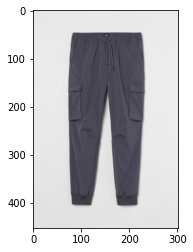

In [42]:
image_number = 0

image_to_query = f'images/images{image_number}.jpg'
img = load_img(image_to_query)
features = module(img)
vector_to_search = np.squeeze(features)

image = plt.imread(image_to_query)
plt.imshow(image)

[1595, 1389, 2121, 1514]


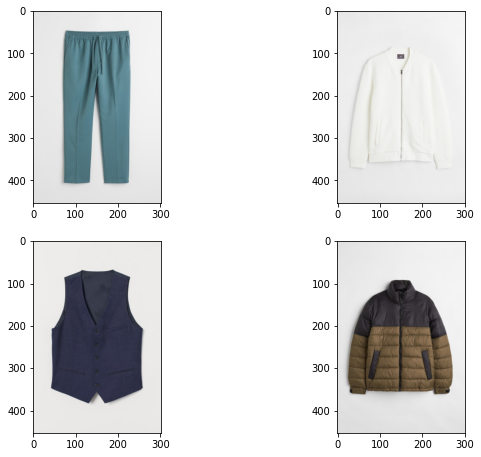

In [43]:
# Search with HNSW for the best passsage
corpus_ids, distances = index.knn_query(vector_to_search, k=top_k_hits)
hits = [{'corpus_id': id, 'score': 1-score} for id, score in zip(corpus_ids[0], distances[0])]

# Append the passages
passages_id = []

for hit in hits[:top_k_hits]:
    if hit['corpus_id'] == image_number:
        pass
    else:
        passages_id.append(int(hit['corpus_id']))

print(passages_id)

plt.figure(figsize=(10, 12))

for i, passage_id in enumerate(passages_id[:top_k_hits]):
    ax = plt.subplot(3, 2, i + 1)

    image = plt.imread(f'./images/images{passage_id}.jpg')
    plt.imshow(image)

plt.show()